In [ ]:
# importing dependencies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# load the dataset to dataframe from panda
wine_df = pd.read_csv('winequality-red.csv')

In [ ]:
# size of the dataframe
wine_df.shape

(1599, 12)

In [ ]:
# fetch the first 5 rows in the dataframe
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# checking for null values or NA
wine_df.isna().sum()
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Data Analysis**

In [ ]:
# summary of statistics for the numeric columns in dataframe
# total number, mean, standard deviation, min, max, 25-50-75% percentile that x% data points are below this value
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


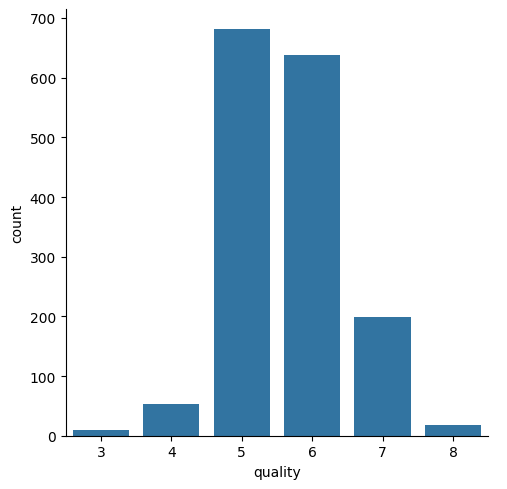

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_df, kind = 'count')
# here you can see most count in quality 5 and 6

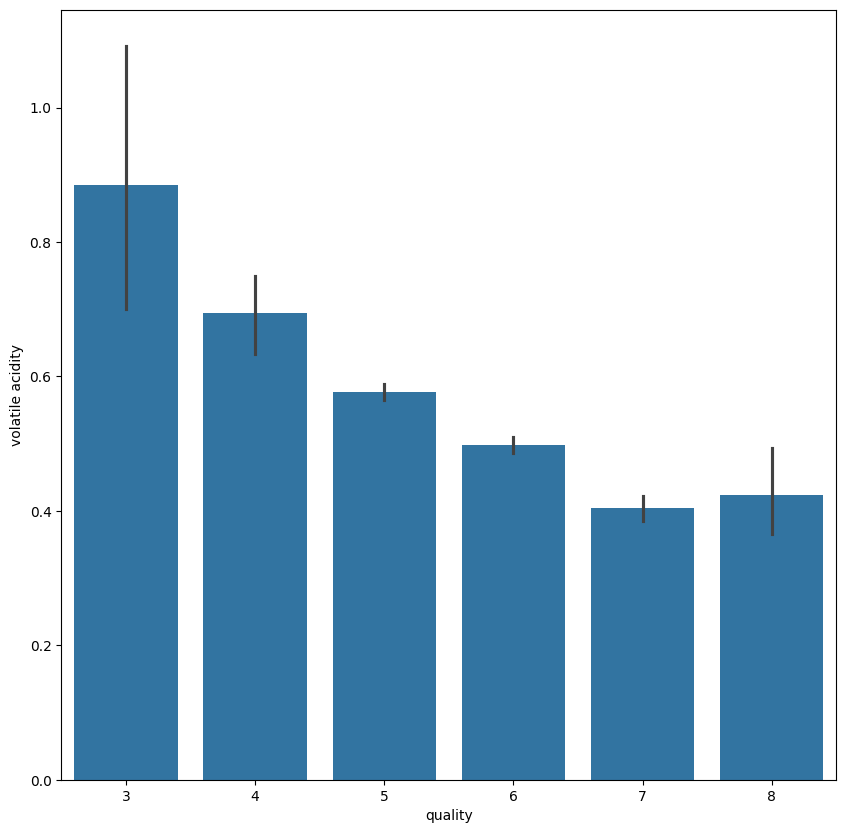

In [ ]:
# Volatile Acidity vs Quality
#Create the figure
plot = plt.figure(figsize=(10,10))
#Create the bar plot
sns.barplot(x='quality', y = 'volatile acidity', data =wine_df)
#Show the plot
plt.show()

# Citric Acid vs Quality

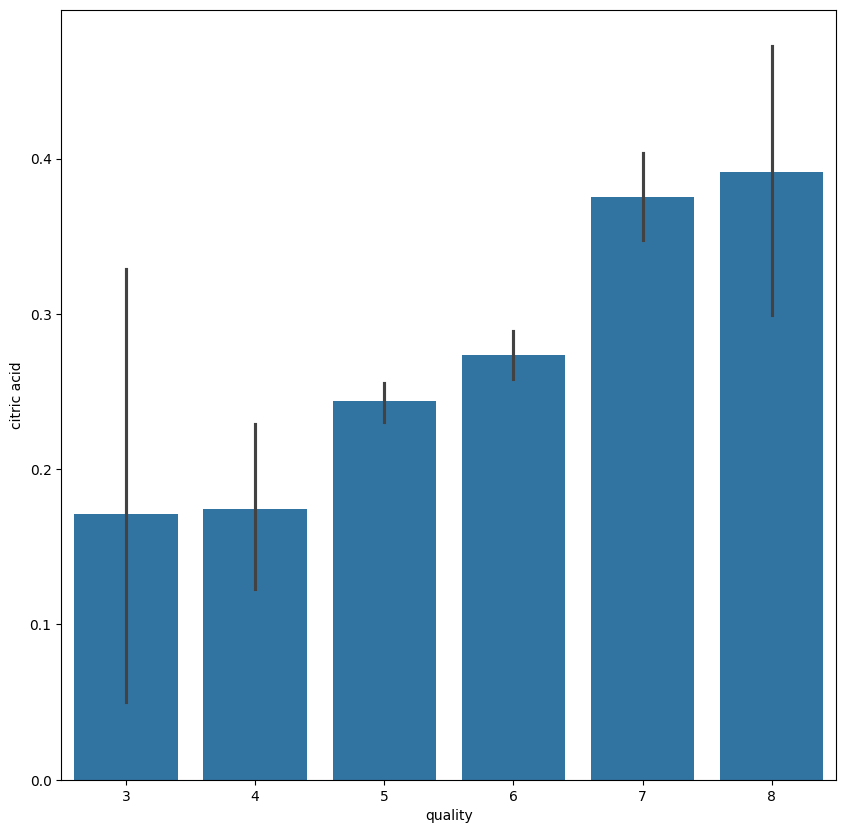

In [ ]:
#Create the figure
plot = plt.figure(figsize=(10,10))
#Create the bar plot
sns.barplot(x='quality', y = 'citric acid', data =wine_df)
#Show the plot
plt.show()

# Total Sulfur dioxide

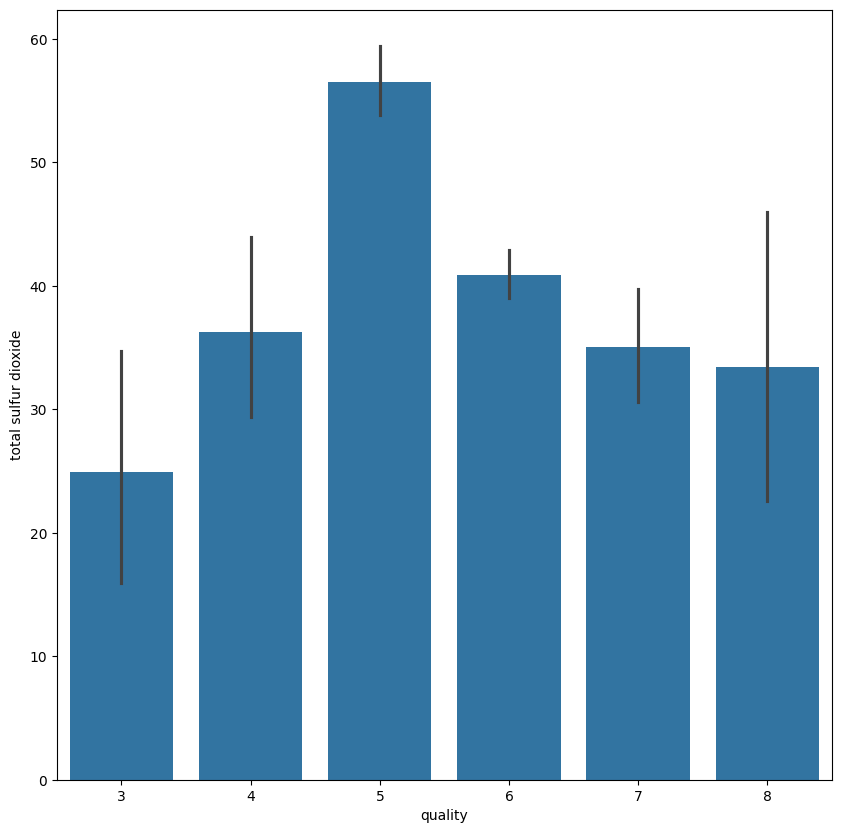

In [ ]:
#Create the figure
plot = plt.figure(figsize=(10,10))
#Create the bar plot
sns.barplot(x='quality', y = 'total sulfur dioxide', data =wine_df)
#Show the plot
plt.show()

# Histogram


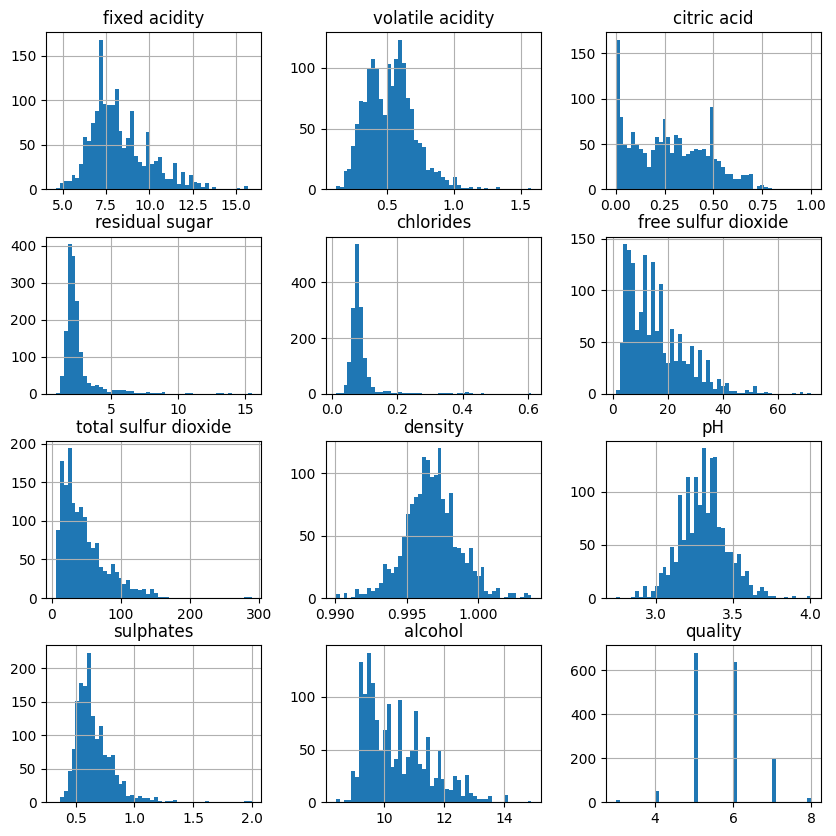

In [ ]:
wine_df.hist(figsize=(10,10),bins = 50)
plt.show()

# **Correlation**

In [ ]:
correlation = wine_df.corr()

ValueError: dictionary update sequence element #0 has length 6; 2 is required

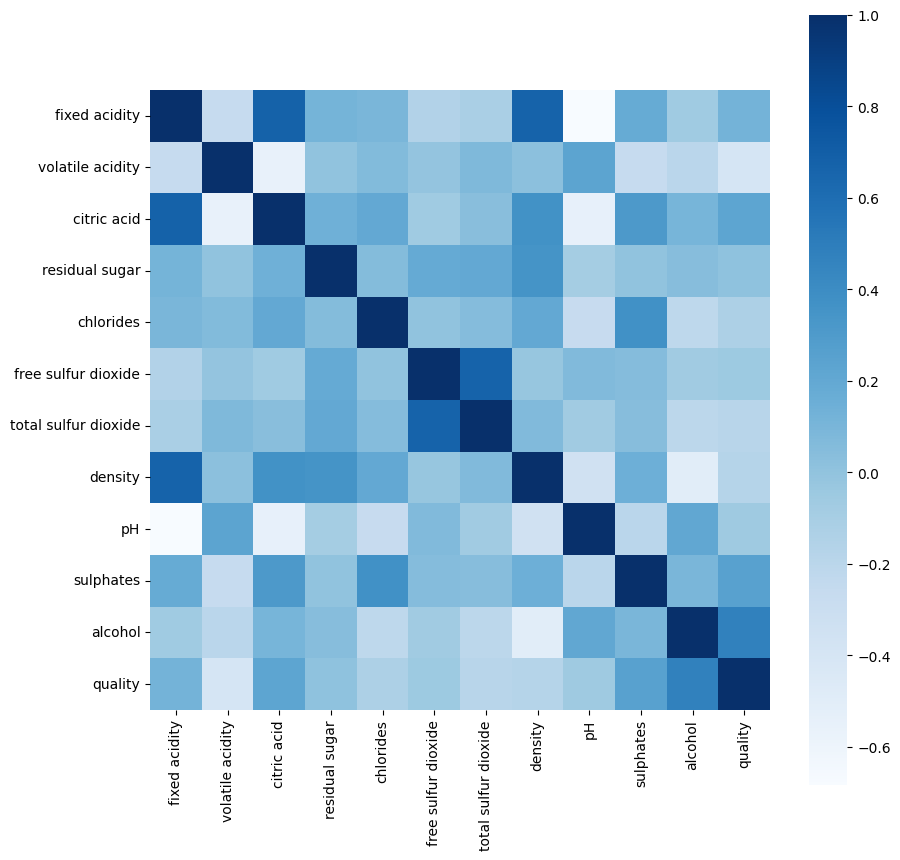

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square= True, fmt='.2f', annot = True, annot_kws={'size:8'}, cmap= 'Blues')

In [ ]:
# separate data and the label
# here we drop 1 column Quality
X = wine_df.drop('quality', axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
# Label binarization
# convert qualityy into binary values on a threshold of 7
Y = wine_df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train and Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Random Forest Algorithm Classifier


In [ ]:
wine_model = RandomForestClassifier()
wine_model.fit(X_train, Y_train)


RandomForestClassifier()

# Build a system model for prediction

In [ ]:
# check the accuracy score om the training model
X_test_prediction = wine_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy Score:', test_data_accuracy)

Accuracy Score: 0.928125


In [ ]:
#input random data from csv
new_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
# change to numpy array
new_data_array = np.asarray(new_data)
# reshape the data for only 1 instance
new_data_reshaped = new_data_array.reshape(1,-1)
#prediction
prediction = wine_model.predict(new_data_reshaped)
if(prediction[0] == 1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
